# Logistic Regression
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.The dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

Equation for Logistic Regression is given by
## $\hat y = \sigma(W^T.X + b)$

To this equation, we need to apply the sigmoid function. Using this we'll get the logistic function.

## Decision Boundary
To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes. Say, if predicted_value ≥ 0.5, then classify email as spam else as not spam. Decision boundary can be linear or non-linear. Polynomial order can be increased to get complex decision boundary.

## Sigmoid Function
Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’. In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. The sigmoid function is given by 

## $\sigma(z) =\frac{1}{1 + e^{-z}} $

## Cost Function
Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters (theta). **Gradient descent converges into global minimum only if the function is convex.** Hence the function needs to be convex.

Explanation of Cost Function

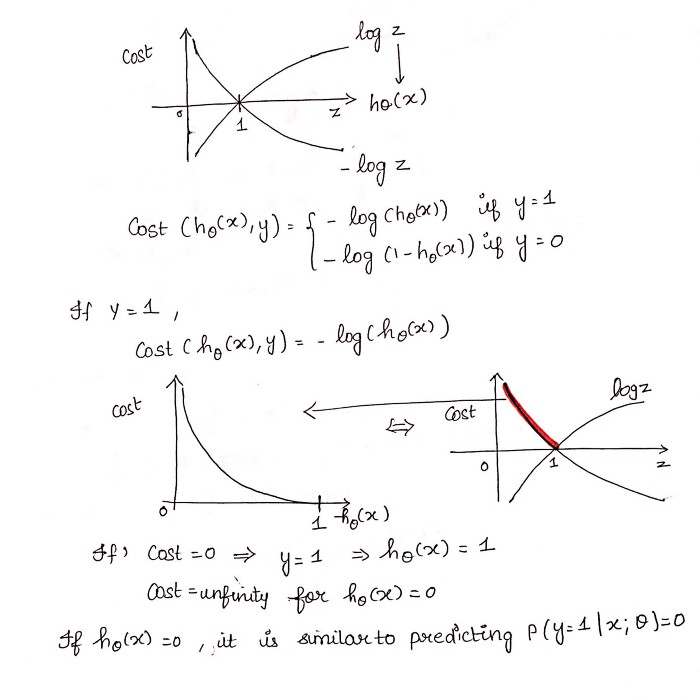
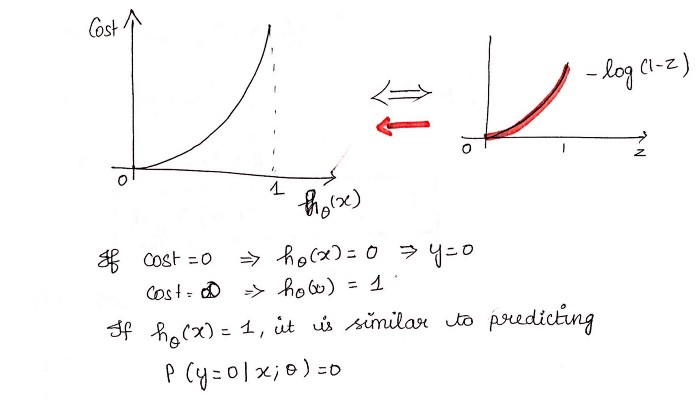

Simplified Cost Function

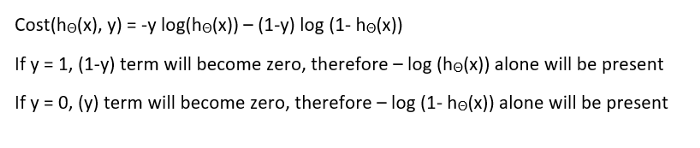

Why this cost function?

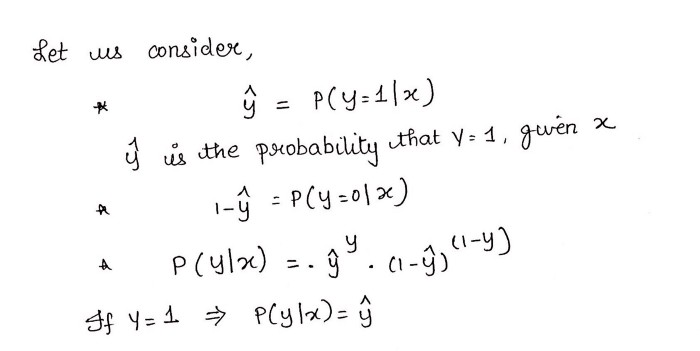
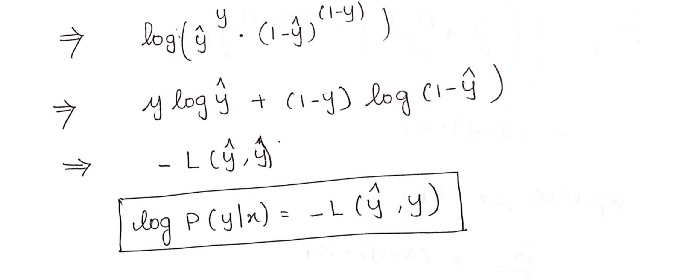
* This negative function is because when we train, we need to maximize the probability by minimizing loss function. Decreasing the cost will increase the maximum likelihood assuming that samples are drawn from an identically independent distribution.

**Deriving the formula for Gradient Descent Algorithm**

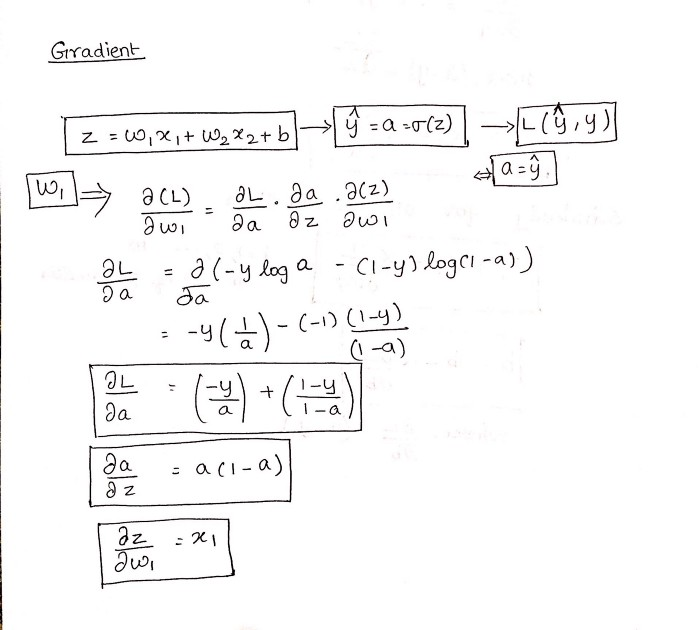
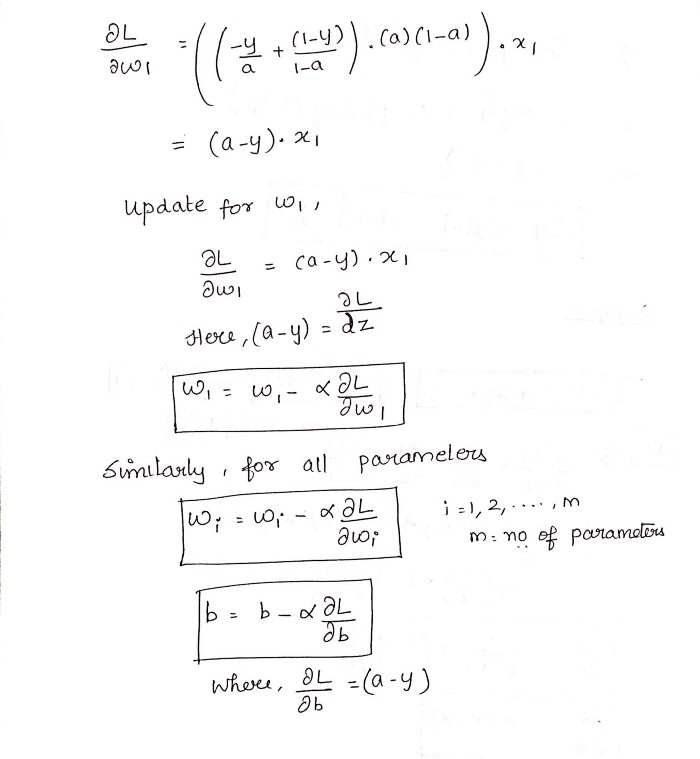

## Methods used in this notebook 
1. Gradient Descent
2. Sci-kit Learn
3. Statsmodels

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("datasets/user-purchase.csv")

## Step 1 - Understanding the data

In [3]:
data.shape

(400, 5)

In [4]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

## Step 2 - Visualize the data

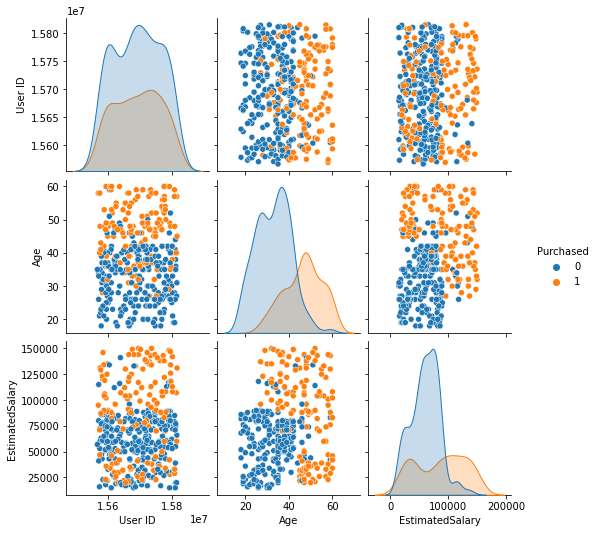

In [6]:
sns.pairplot(data,hue='Purchased')

/home/shophy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


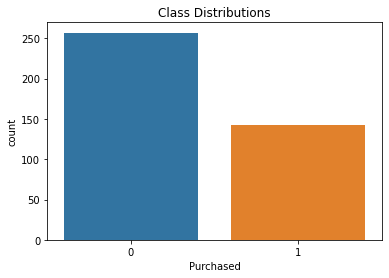

In [7]:
# Plotting graph for Purchased
plt.figure(figsize=(6, 4))
sns.countplot('Purchased', data=data)
plt.title('Class Distributions')
plt.show()

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

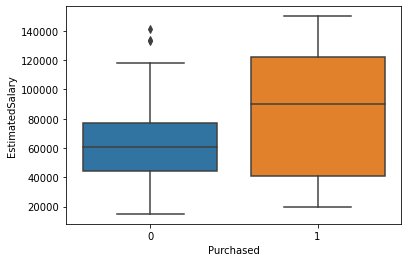

In [8]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

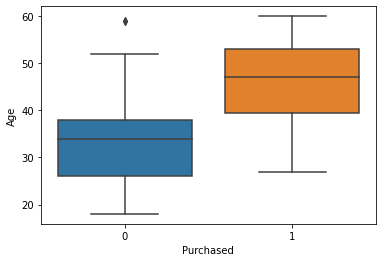

In [9]:
sns.boxplot(x='Purchased',y='Age',data=data)

<AxesSubplot:>

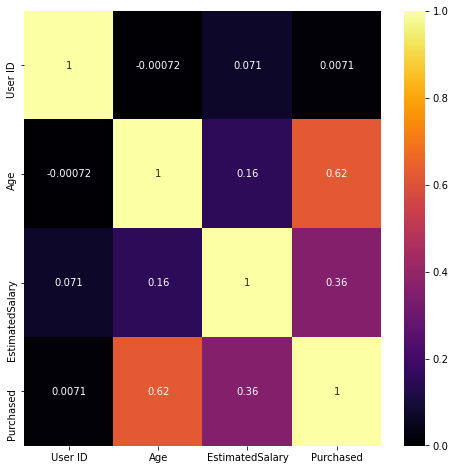

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='inferno')

We can see the relationship between Age and Purchased is the one that will have the most impact in predicting, hence Age will be our X.

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

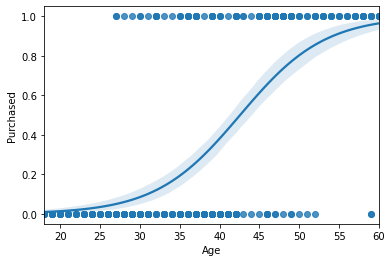

In [11]:
sns.regplot(x='Age', y='Purchased', data=data, logistic=True)

In [12]:
X = data.iloc[:, [2]].values
y = data.iloc[:,4].values

In [13]:
# Getting the train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3(I) - Logistic Regression using Gradient Descent

Gradient Descent is essentially minimization of the loss function which can be broken into a few steps:
1. We find derivatives of the loss function with respect to each weight. Derivatives can tell which direction and by how much we should change weight to make the model loss a bit smaller.
2. Updating each weight according to derivative until the local minimum is found, i.e. model doesn’t improve anymore so we can stop.

The Loss Function is given by 

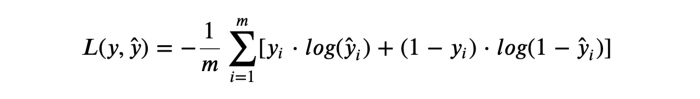

Gradient Descent then sums up to 
1. Finding derivative of Loss Function 

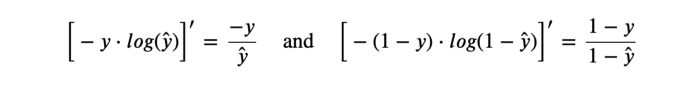 

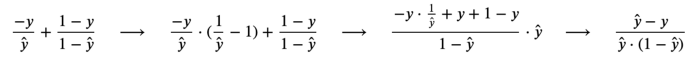

2. Finding derivative of Sigmoid Function

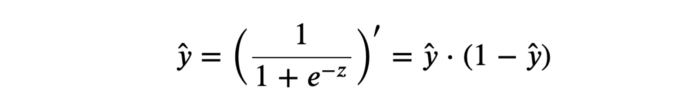

3. Finding derivative of z

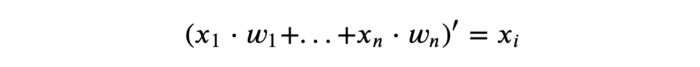

According to the chain rule, we multiply each derived function, so we get the following:

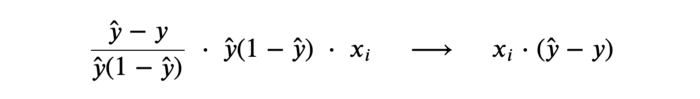

In [14]:
from numpy import log, dot, e

In [15]:
X1 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
y1 = y_train[:, np.newaxis]
W = np.zeros((X1.shape[1], 1))

### Defining the sigmoid function

In [16]:
def sigmoid(z):
    return 1 / (1 + e**(-z))

### Defining the cost function

When implementing logistic regression, our job is to learn parameters w and b so that ŷ is approximately equal to the test target . To learn the parameters w and b, we need to define a cost function which we would use to train the logistic regression model. A cost function is an estimator of how good or bad our model is in predicting the known output in general. But before that let us understand what a loss (error) function is.

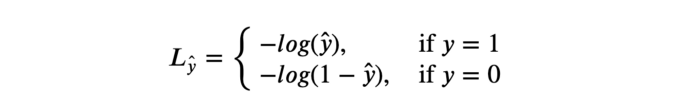

This is then used to form the cost function (Loss function) seen above. 

In [17]:
def cost_function(W, X, y):
    z = dot(X.T, W)
    predict_1 = y * log(sigmoid(z))
    predict_0 = (1 - y) * log(1 - sigmoid(z))
    return -sum(predict_1 + predict_0) / len(X)

### Fit the model using Gradient Descent

The Gradient Descent Equation is given by
### $x_i(\hat y - y)$

In [18]:
def grad_desc(X, y, W, epochs=25, lr=0.05):
    loss = []
    N = len(X)
                 
    for _ in range(epochs):        
        # Gradient Descent
        y_hat = sigmoid(dot(X, W))
        W -= lr * dot(X.T,  y_hat - y) / N            
        # Saving Progress
        loss.append(cost_function(X, y, W)) 
            
    return W,loss
    return beta, num_iter

In [19]:
W, loss = grad_desc(X1, y1, W)

<ipython-input-17-7903a70eacc1>:4: RuntimeWarning: divide by zero encountered in log
  predict_0 = (1 - y) * log(1 - sigmoid(z))


### Predictions

In [20]:
def predict(X,W):
    pred = []
    z = dot(X, W.T)
    z = z.tolist()
    for i in z:
        p = 1 / (1 + e**(-i[0]))
        if p > 0.5:
            pred.append(1)
        else:
            pred.append(0)
    # Returning binary result
    return pred

In [21]:
y_pred1 = predict(X_test,W)

In [22]:
print("Total labels:",len(y_test))
print("Correctly predicted labels:", np.sum(y_test == y_pred1)) 

Total labels: 80
Correctly predicted labels: 58


### Evaluating the model

In [23]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred1) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[58  0]
 [22  0]]


In [24]:
print("Accuracy = ",metrics.accuracy_score(y_test,y_pred1)*100,"%")

Accuracy =  72.5 %


## Step 3(II) - Logistic Regression Using Sci-Kit Learn

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Making predictions

In [27]:
y_pred2 = model.predict(X_test)

In [28]:
print("Total labels:",len(y_test))
print("Correctly predicted labels:", np.sum(y_test == y_pred2)) 

Total labels: 80
Correctly predicted labels: 75


In [29]:
predictions2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predictions2.head(5)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Evaluating the model

**Confusion Matrix**

In [30]:
cm2 = metrics.confusion_matrix(y_test, y_pred2)
cm2

array([[57,  1],
       [ 4, 18]])

Text(0.5, 257.44, 'Predicted label')

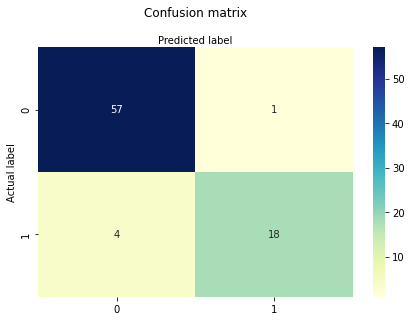

In [31]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Accuracy, Precision and Recall**

In [32]:
print("Accuracy = ",metrics.accuracy_score(y_test,y_pred2)*100,"%")
print("Precision = ","{:.2f}".format(metrics.precision_score(y_test, y_pred2)*100),"%")
print("Recall = ","{:.2f}".format(metrics.recall_score(y_test, y_pred2)*100),"%")

Accuracy =  93.75 %
Precision =  94.74 %
Recall =  81.82 %


**F-measure and Support**

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.95      0.82      0.88        22

    accuracy                           0.94        80
   macro avg       0.94      0.90      0.92        80
weighted avg       0.94      0.94      0.94        80



**ROC Curve**

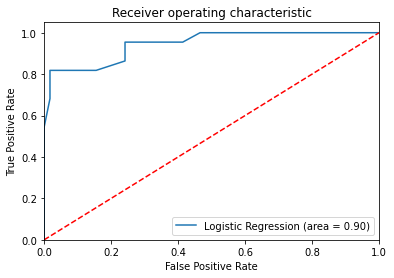

In [34]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred2)

logit_roc_auc = auc
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Step 3(III) - Logistic Regression Using Statsmodel

In [35]:
import statsmodels.api as sm 

In [36]:
stats_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.689438
         Iterations 3


In [37]:
print(stats_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  320
Model:                          Logit   Df Residuals:                      319
Method:                           MLE   Df Model:                            0
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                -0.03966
Time:                        18:15:35   Log-Likelihood:                -220.62
converged:                       True   LL-Null:                       -212.20
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0044      0.003     -1.537      0.124      -0.010       0.001


### Making Predictions

In [38]:
y_pred3 = list(map(round,stats_model.predict(X_test)))

In [39]:
print("Total labels:",len(y_test))
print("Correctly predicted labels:", np.sum(y_test == y_pred3)) 

Total labels: 80
Correctly predicted labels: 58


In [40]:
predictions3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
predictions3.head(5)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Evaluating the model

**Confusion Matrix**

In [41]:
cm3 = metrics.confusion_matrix(y_test, y_pred3)
cm3

array([[58,  0],
       [22,  0]])

Text(0.5, 257.44, 'Predicted label')

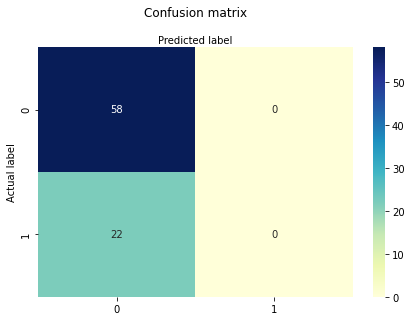

In [42]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Accuracy**

In [43]:
print("Accuracy = ",metrics.accuracy_score(y_test,y_pred3)*100,"%")

Accuracy =  72.5 %
